In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

### Connect to SQLite Database

In [2]:
connection = sqlite3.connect('shiptivity.db')

## Execute Queries and Retrieve Data

#### Query for Daily Average Users Before and After Feature Change

In [3]:
feature_change_timestamp = 1527897600 # Unix timestamp for 2018-06-02

query_before = f"""
SELECT
    DATE(login_timestamp, 'unixepoch') AS date,
    COUNT(DISTINCT user_id) AS daily_user_count
FROM login_history
WHERE login_timestamp < {feature_change_timestamp}
GROUP BY date
ORDER BY date;
"""
df_before = pd.read_sql_query(query_before, connection)

query_after = f"""
SELECT
    DATE(login_timestamp, 'unixepoch') AS date,
    COUNT(DISTINCT user_id) AS daily_user_count
FROM login_history
WHERE login_timestamp >= {feature_change_timestamp}
GROUP BY date
ORDER BY date;
"""
df_after = pd.read_sql_query(query_after, connection)

#### Query for Number of Status Changes by Card

In [4]:
query_change = f"""
SELECT
    cardID,
    COUNT(*) AS status_change_count
FROM card_change_history
GROUP BY cardID
ORDER BY status_change_count DESC;
"""
df_change = pd.read_sql_query(query_change, connection)

## Generate the Graphs

#### Graph for Daily Average Users Before and After Feature Change

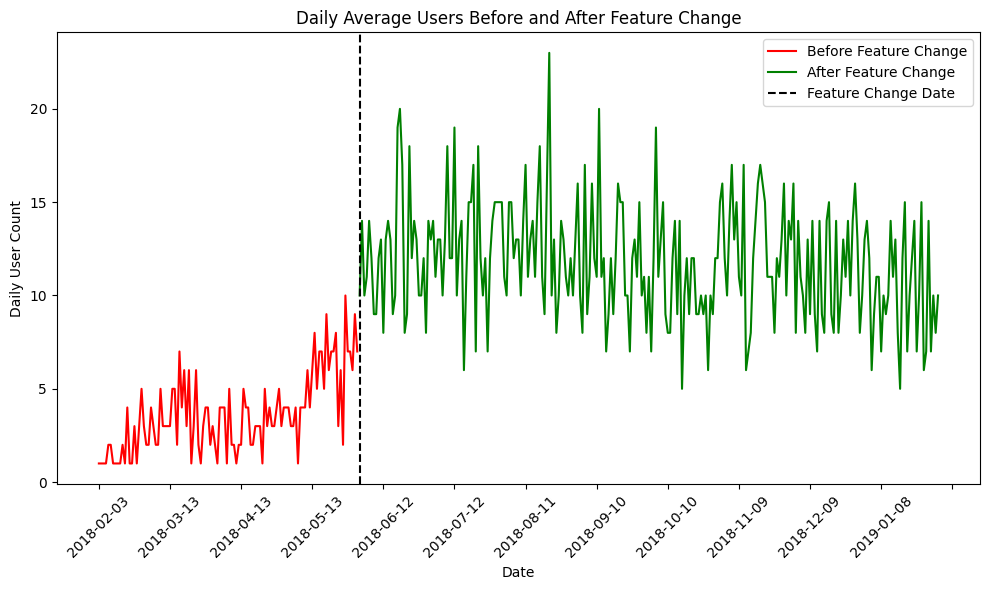

In [5]:
feature_change_date = pd.to_datetime(feature_change_timestamp, unit='s').strftime('%Y-%m-%d')

plt.figure(figsize=(10, 6))

plt.plot(df_before['date'], df_before['daily_user_count'], label='Before Feature Change', color='red')
plt.plot(df_after['date'], df_after['daily_user_count'], label='After Feature Change', color='green')

plt.axvline(x=feature_change_date, color='black', linestyle='--', label='Feature Change Date')

plt.title('Daily Average Users Before and After Feature Change')
plt.xlabel('Date')
plt.ylabel('Daily User Count')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=13))

plt.legend()
plt.tight_layout()
plt.show()
